**SIMPLE LINEAR REGRESSION**

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [23]:
df = pd.read_csv("../data/FuelConsumptionCo2.csv")  

In [24]:
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
404,2014,FORD,FOCUS FFV,COMPACT,2.0,4,AS6,E,11.7,8.5,10.3,27,165
378,2014,FORD,F150 FFV,PICKUP TRUCK - STANDARD,3.7,6,AS6,E,18.8,13.7,16.5,17,264
885,2014,PORSCHE,911 TURBO S CABRIOLET,MINICOMPACT,3.8,6,AM7,Z,13.7,9.6,11.9,24,274
209,2014,CHEVROLET,EQUINOX AWD,SUV - SMALL,3.6,6,A6,E,19.8,13.6,17.0,17,272
868,2014,PORSCHE,911 CARRERA 4,MINICOMPACT,3.4,6,M7,Z,12.4,8.6,10.7,26,246


In [25]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [26]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [27]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS' ]]
cdf.sample(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
490,1.8,4,7.6,175
964,2.0,4,7.7,177
548,3.0,6,10.6,244
226,4.8,8,18.2,419
766,5.5,8,15.5,356


array([[<Axes: title={'center': 'ENGINESIZE'}>,
        <Axes: title={'center': 'CYLINDERS'}>],
       [<Axes: title={'center': 'FUELCONSUMPTION_COMB'}>,
        <Axes: title={'center': 'CO2EMISSIONS'}>]], dtype=object)

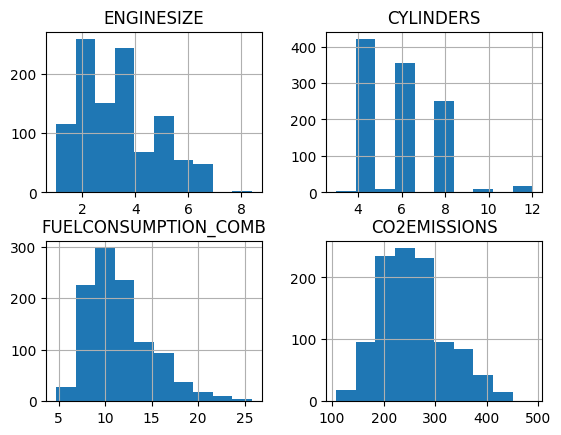

In [28]:
viz = cdf[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS' ]]
viz.hist()

Text(0, 0.5, 'CO2EMISSIONS')

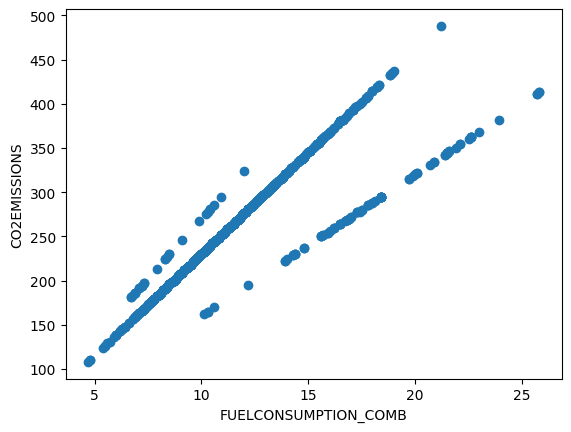

In [29]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS)
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")

Text(0, 0.5, 'CO2EMISSIONS')

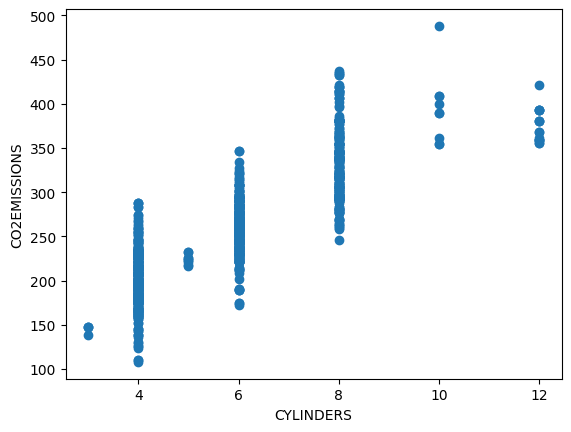

In [30]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS)
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")

(0.0, 25.0)

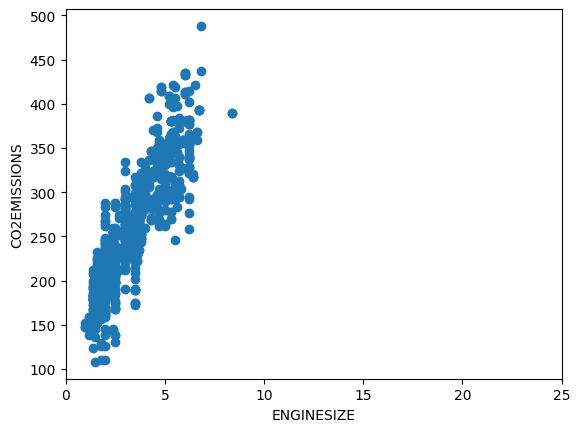

In [31]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS)
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.xlim(0,25)

In [32]:
X = cdf.ENGINESIZE.to_numpy()
Y = cdf.CO2EMISSIONS.to_numpy()

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 42)

In [34]:
type(X_test), np.shape(X_test), np.ndim(X_test)

(numpy.ndarray, (214,), 1)

In [35]:
from sklearn import linear_model

regressor =linear_model.LinearRegression()
regressor.fit(X_train.reshape(-1,1), Y_train)

print("Regressor Coefficient: ", regressor.coef_[0])
print("Regressor Intercept: ",regressor.intercept_)

Regressor Coefficient:  38.992978724434074
Regressor Intercept:  126.28970217408721


Text(0, 0.5, 'Emission')

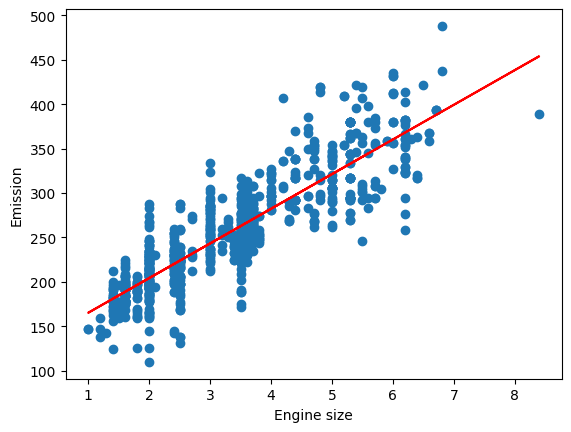

In [36]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, regressor.coef_ * X_train + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Y_testM = regressor.predict(X_test.reshape(-1,1))

print("Mean absolute error: %.2f" % mean_absolute_error(Y_test, Y_testM))
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_testM))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(Y_test, Y_testM)))
print("R2-score: %.2f" % r2_score(Y_test, Y_testM))

Mean absolute error: 24.10
Mean squared error: 985.94
Root mean squared error: 31.40
R2-score: 0.76


Text(0, 0.5, 'Emission')

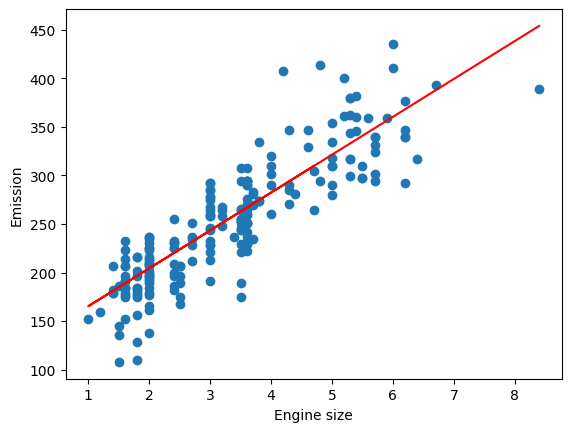

In [38]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, regressor.intercept_ + X_test * regressor.coef_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [39]:
X = cdf.FUELCONSUMPTION_COMB.to_numpy()

# Multiple Linear Regression

In [40]:
df1 = pd.read_csv("../data/FuelConsumptionCo2.csv")  

In [41]:
df1.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [42]:
df1 = df1.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE',], axis=1)

In [43]:
df1.corrwith(df1["CO2EMISSIONS"])

ENGINESIZE                  0.874154
CYLINDERS                   0.849685
FUELCONSUMPTION_CITY        0.898039
FUELCONSUMPTION_HWY         0.861748
FUELCONSUMPTION_COMB        0.892129
FUELCONSUMPTION_COMB_MPG   -0.906394
CO2EMISSIONS                1.000000
dtype: float64

In [44]:
df1 =df1.drop([ 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',], axis=1)
df1

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244
...,...,...,...
1062,3.0,24,271
1063,3.2,25,264
1064,3.0,24,271
1065,3.2,25,260


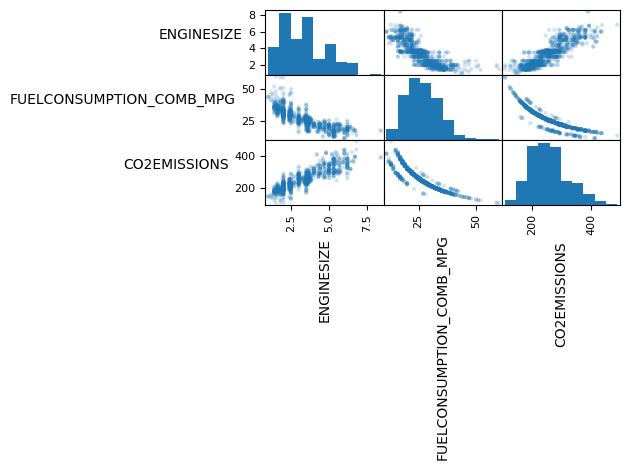

In [45]:
axes = pd.plotting.scatter_matrix(df1, alpha=0.2)

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [46]:
X =df1.iloc[:, [0,1] ].to_numpy()
Y =df1.iloc[:, [2] ].to_numpy()

In [47]:
from sklearn import preprocessing

std_sclaer = preprocessing.StandardScaler() # what it does is subtract the mean and divide by the standard deviation

X_std = std_sclaer.fit_transform(X)

In [48]:
pd.DataFrame(X_std).describe().round(2)

,0,1
count,1067.00,1067.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.66,-2.07
25%,-0.95,-0.73
50%,0.04,-0.06
75%,0.67,0.61
max,3.57,4.50


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y, test_size=0.2, random_state=42)

In [50]:
regressor = linear_model.LinearRegression()

regressor.fit(X_train,Y_train)

coef_ =  regressor.coef_
intercept_ = regressor.intercept_
print(coef_)
print(intercept_)

[[ 25.27339614 -37.4381472 ]]
[256.29072488]


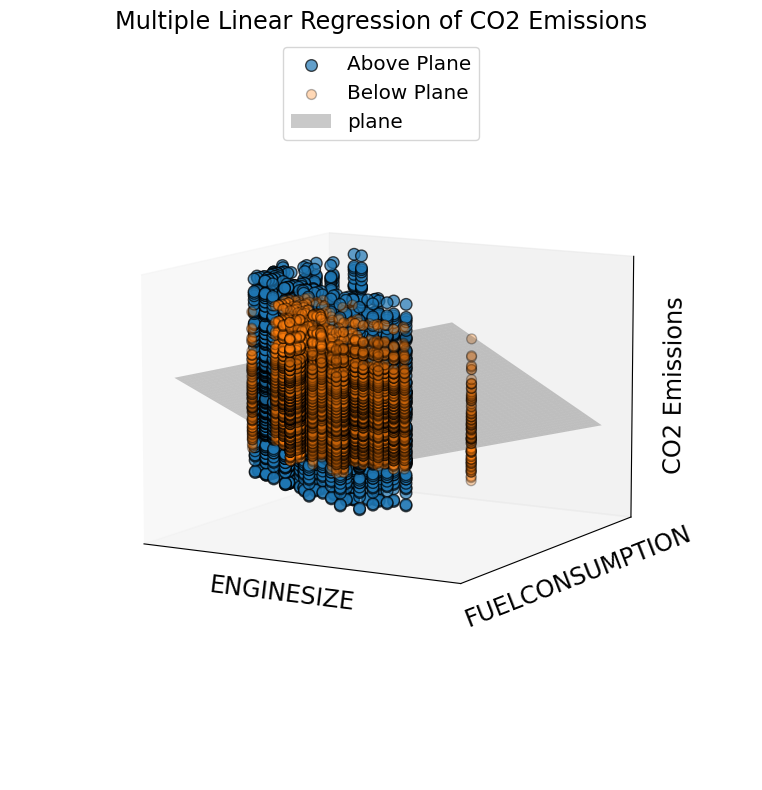

In [51]:
X1 = X_test[:,0] if X_test.ndim > 1 else X_test
X2 = X_test[:,1] if X_test.ndim > 1 else np.zeros_like(X1)

x1_surf, x2_surf = np.meshgrid(np.linspace(X1.min(), X1.max(), 100),
                               np.linspace(X2.min(), X2.max(), 100),)

y_surf = intercept_ + coef_[0,0] * x1_surf + coef_[0,1] * x2_surf

Y_pred = regressor.predict(X_test.reshape(-1,1)) if X_test.ndim == 1 else regressor.predict(X_test)

above_plane = Y_test >=  Y_pred
below_plane = Y_test < Y_pred

above_plane = above_plane[:, 0]
below_plane = below_plane[:, 0]

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(X1[above_plane], X2[above_plane], Y_test[above_plane], label="Above Plane", s=70, alpha=.7, ec='k')
ax.scatter(X1[below_plane], X2[below_plane], Y_test[below_plane], label="Below Plane", s=50, alpha=.3, ec='k')

ax.plot_surface(x1_surf, x2_surf, y_surf, color='k', alpha=0.21,label='plane')

ax.view_init(elev=10)

ax.legend(fontsize='x-large',loc='upper center')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_box_aspect(None, zoom=0.75)
ax.set_xlabel('ENGINESIZE', fontsize='xx-large')
ax.set_ylabel('FUELCONSUMPTION', fontsize='xx-large')
ax.set_zlabel('CO2 Emissions', fontsize='xx-large')
ax.set_title('Multiple Linear Regression of CO2 Emissions', fontsize='xx-large')
plt.tight_layout()
plt.show()

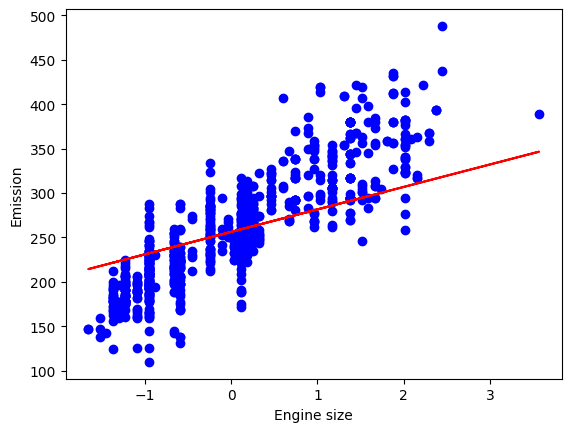

In [52]:
plt.scatter(X_train[:,0], Y_train,  color='blue')
plt.plot(X_train[:,0], coef_[0,0] * X_train[:,0] + intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

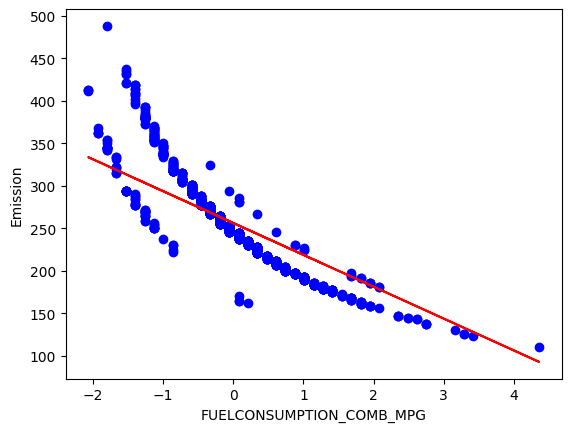

In [53]:
plt.scatter(X_train[:,1], Y_train,  color='blue')
plt.plot(X_train[:,1], coef_[0,1] * X_train[:,1] + intercept_[0], '-r')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")
plt.show()